# Life of Epilepsy Patients

**Goal:**

Characterize the life of epilepsy patients in terms of:
- employment
- medicines
- education
- illness
- health
- well-being

**The dataset: **

**Welsh Health Status 2014**, obtained from UKDS https://discover.ukdataservice.ac.uk/catalogue/?sn=7841&type=Data%20catalogue#documentation. 

The Welsh Health Survey (WHS) collects information about the health of people living in Wales, which is based on a representative sample of adults aged 16 and over living in private households in Wales. 

> ### Data Description

There are intotal **14170** adults nearly uniformly distributed among different age ranges, among which we have **137** epilepsy patients. 

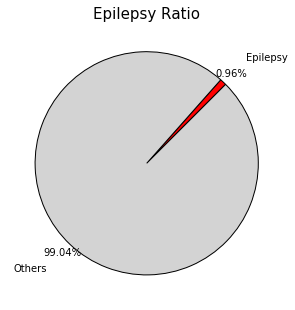

In [154]:
plt.figure(figsize=(5, 5))

plt.pie([137, 14170], 
        labels=['Epilepsy', 'Others'], 
        colors=['red', 'lightgrey'],
        autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.3,shadow=False, startangle=45)

plt.title("Epilepsy Ratio",fontsize = 15)


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
%matplotlib inline

>### Data Wrangling

In [2]:
whs = pd.read_csv("Welsh Health Status/tab/whs_2014_adult_archive.tab",delimiter="\t",low_memory=False)
whs.head(10)

,archhsn,archpsn,tenure3,hhdtypb,nssec8,nssec5,nssec3,hhchild,region,whsyear,...,exvigno,exerv,exercise,exergrp,exergrp5,exerstr,exer0,noex,wt_hhold,wt_adult
0,1001011,100101101,1,7,6,5,3,2,2,11,...,0,4,1,2,5,3,0,1,1.342344,1.132830
1,1001021,100102101,3,2,2,1,1,2,2,11,...,0,3,0,1,4,3,0,1,1.759103,2.053860
2,1001021,100102102,3,2,2,1,1,2,2,11,...,0,7,1,2,5,3,0,1,1.759103,2.565752
3,1001041,100104101,3,3,-9,-9,-9,1,2,11,...,1,0,0,1,4,2,0,1,1.465895,1.783198
4,1001061,100106101,3,1,6,5,3,2,2,11,...,1,0,0,0,0,0,1,0,1.314582,1.349142
5,1001071,100107101,1,5,2,1,1,2,2,11,...,0,2,0,1,3,3,0,1,1.651591,1.797099
6,1001071,100107103,1,5,2,1,1,2,2,11,...,1,0,0,0,0,1,1,1,1.651591,1.526991
7,1001091,100109101,3,3,6,5,3,1,2,11,...,0,1,0,1,2,3,0,1,1.497235,1.621857
8,1001101,100110101,1,7,6,5,3,2,2,11,...,1,0,0,0,0,0,1,0,1.549911,1.422498
9,1001131,100113101,1,5,6,5,3,2,2,11,...,1,0,0,0,0,0,1,0,1.782162,1.922659


In [3]:
def get_labels(path,flag):

    # open explain file
    explain = open(path, 'r')

    # read the whole file as a single giant string
    explain_text = explain.read()

    # locate variable target string in the whole file
    target_string_var = 'Variable label ='
    target_loc_var = [m.end() for m in re.finditer(target_string_var, explain_text)]
    var_name_list = []
    # locate type target string in the whole file
    target_string_type = 'the SPSS measurement level is'
    target_loc_type = [m.end() for m in re.finditer(target_string_type, explain_text)]
    type_list = ["Categorical" for i in target_loc_var]

    #Find Numeric or Categorical
    for index, loc in enumerate(target_loc_type):
        # get feature character
        char = explain_text[loc+10]
        if char == "S" or char == "s":
            # it is SPSS data type ORDINAL or NOMINAL
            # it is categorical data
            type_list[index] = "Numeric"

            
    #Find variable label
    if flag == 0:
        for loc in target_loc_var:
            start_point = loc+11
            end_point = explain_text.find('\\\n', loc)
            var_name_list.append(explain_text[start_point:end_point])
    elif flag ==1:
        for loc in target_loc_var:
            start_point = loc+8
            end_point = explain_text.find('\par', loc)
            var_name_list.append(explain_text[start_point:end_point])
        
    explain.close()   
    return var_name_list, type_list

In [7]:
# get labels for predictors
whs_path = 'Welsh Health Status/mrdoc/allissue/whs_2014_adult_archive_ukda_data_dictionary.rtf'
whs_labels, whs_type  = get_labels(whs_path,1)
print whs_labels[:3]
whs.columns = whs_labels
whs.head(10)

['Household serial number (archive)', 'Person serial number (archive)', '(D) 3 class Housing Tenure']


In [11]:
#replace blank with nan
whs.replace(' ',np.nan,inplace=True)
print whs.shape

(14170, 468)


In [10]:
#Check nan values
def check_nan(df, name):
    print len(df[name][df[name].isnull()])
    
for name in whs.columns:
    check_nan(whs,name)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14170
14170
14170
14170
0
14170
14170
14170
14170
0
14170
14170
14170
14170
0
14170
14170
14170
14170
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14170
14170
14170
14170
14170
14170
14170
14170
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14170
14170
14170
14170
14170
14170
14170
14170
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
#convert all the predictors to numeric and replace negtive values as nan
def to_numeric(df):         
    #process data        
    x = df.copy()
    
    for index,column in enumerate(x.columns.values):
        temp = pd.to_numeric(x.iloc[:,index],errors='coerce')
        temp[temp < 0] = np.NaN
        x[column] = temp
    return x

In [37]:
#cleaned data of whole population
whs_complete = to_numeric(whs) 

In [155]:
#see number of epilepsy patients
whs_complete["Epilepsy - currently treated"].value_counts()

2.0    13256
1.0      137
Name: Epilepsy - currently treated, dtype: int64

In [177]:
#epilepsy patients!
response = "Epilepsy - currently treated"
epi = whs_complete[whs_complete[response] == 1]
print epi.shape
epi.head()

(137, 468)


,Household serial number (archive),Person serial number (archive),(D) 3 class Housing Tenure,(D) Household Type,(D) NS-SEC 8 classes,(D) NS-SEC 5 classes,(D) NS-SEC 3 classes,(D) Any children in household,(D) Region,WHS year,...,No vigorous exercise in last 7 days,(D) No of days of vigorous exercise,(D) At least 30 mins mod/vigorous exercise on 5+ days,(D) No of days at least 30 mins mod/vigorous exercise,(D) No of days at least 30 mins mod/vigorous exercise (grouped),(D) Most strenuous exercise done in last 7 days,(D) 0 active days,(D) No exercise in last week - binary,Household NR weight,Individual NR weight
381,1019221,101922102,2.0,5,5.0,4.0,3.0,2,2,11,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.819936,0.876701
527,1025201,102520102,1.0,6,3.0,2.0,2.0,2,1,11,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.641642,0.543043
905,1043061,104306102,1.0,6,3.0,2.0,2.0,2,1,11,...,1.0,0.0,1.0,2.0,5.0,2.0,0.0,1.0,0.610468,0.498620
969,1045251,104525102,2.0,6,6.0,5.0,3.0,2,1,11,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.416261,1.427064
1017,1048031,104803101,1.0,2,2.0,1.0,1.0,2,3,11,...,0.0,2.0,0.0,1.0,3.0,3.0,0.0,1.0,1.140673,1.286743


>### Data Analysis

There are in total **137** epilepsy patients of all **14170** people. In this part, I want to compare several key features of **epilepsy patients** to the **general population**, such as **well-being, health, medication**. From all the predictors I will select some features that shows noticeable **difference** between epilepsy patients and the whole population.

In [160]:
#a function to deliver comparation
def compare(name):
    #ratio and count among whole population
    print pd.to_numeric(whs_complete[name],errors='coerce').value_counts()/pd.to_numeric(whs_complete[name],errors='coerce').value_counts().sum()
    print whs_complete[name].value_counts()
    
    #ratio and count among epilepsy patients
    print epi[name].value_counts()/epi[name].value_counts().sum()
    print epi[name].value_counts()

In [178]:
compare("General Health")

1.0    0.642320
2.0    0.225074
3.0    0.131329
4.0    0.001276
Name: General Health, dtype: float64
1.0    9058
2.0    3174
3.0    1852
4.0      18
Name: General Health, dtype: int64
3.0    0.445255
2.0    0.306569
1.0    0.240876
4.0    0.007299
Name: General Health, dtype: float64
3.0    61
2.0    42
1.0    33
4.0     1
Name: General Health, dtype: int64


In [158]:
compare("Work status")

2.0     0.471669
9.0     0.278480
10.0    0.077261
8.0     0.057927
1.0     0.052201
11.0    0.030562
6.0     0.014352
4.0     0.006023
7.0     0.004387
3.0     0.003941
5.0     0.003198
Name: Work status, dtype: float64
2.0     6343
9.0     3745
10.0    1039
8.0      779
1.0      702
11.0     411
6.0      193
4.0       81
7.0       59
3.0       53
5.0       43
Name: Work status, dtype: int64
8.0     0.408
2.0     0.224
9.0     0.208
10.0    0.048
11.0    0.040
6.0     0.024
3.0     0.024
7.0     0.016
4.0     0.008
Name: Work status, dtype: float64
8.0     51
2.0     28
9.0     26
10.0     6
11.0     5
6.0      3
3.0      3
7.0      2
4.0      1
Name: Work status, dtype: int64


In [159]:
compare("Regular prescribed medication")

1.0    0.583279
2.0    0.416721
Name: Regular prescribed medication, dtype: float64
1.0    8044
2.0    5747
Name: Regular prescribed medication, dtype: int64
1.0    0.970588
2.0    0.029412
Name: Regular prescribed medication, dtype: float64
1.0    132
2.0      4
Name: Regular prescribed medication, dtype: int64


In [166]:
compare("5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc")

0.0    0.640539
1.0    0.359461
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: float64
0.0    8409
1.0    4719
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: int64
0.0    0.769231
1.0    0.230769
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: float64
0.0    90
1.0    27
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: int64


In [168]:
compare("1-4 O levels/CSEs/GCSEs (any grades)")

0.0    0.606871
1.0    0.393129
Name: 1-4 O levels/CSEs/GCSEs (any grades), dtype: float64
0.0    7967
1.0    5161
Name: 1-4 O levels/CSEs/GCSEs (any grades), dtype: int64
0.0    0.769231
1.0    0.230769
Name: 1-4 O levels/CSEs/GCSEs (any grades), dtype: float64
0.0    90
1.0    27
Name: 1-4 O levels/CSEs/GCSEs (any grades), dtype: int64


> ### Plot and visualize

Of all the 468 features, I filtered some that are most representative of the life of epilepsy patients. From the statistics below, you can really see what epilepsy has brought to the life of epilepsy patients. 

**Key words** of life of epilepsy patients:
- Chronic Disease
- Regular Prescribed medication
- Depression
- Anxiety
- Permanently unable to work
- Low education
- Not Healthy
- Low Vitality
- Low life satisfaction
- Limit on bathing or dressing 

In [340]:
def stat(name):
    
    #ratio and count among whole population
    whole = pd.to_numeric(whs_complete[name],errors='coerce').value_counts()/pd.to_numeric(whs_complete[name],errors='coerce').value_counts().sum()
    whole.sort_index(inplace = True)
    print whole
    
    #ratio and count among epilepsy patients
    e = epi[name].value_counts()/epi[name].value_counts().sum()
    e.sort_index(inplace = True)
    print e
    
    if name == "Work status":
        return whole[[2,3,8]].values, e[[2,3,8]].values
    else:
        return whole.values, e.values

In [380]:
def plot(title, ticks, a, b):

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(len(a))
    bar_width = 0.15/4 * len(a)
    opacity = 0.8

    rects1 = plt.bar(index, a, bar_width,
                     alpha=opacity,
                     color='grey',
                     label='Population',align='center')

    rects2 = plt.bar(index + bar_width, b, bar_width,
                     alpha=opacity,
                     color='red',
                     label='Epilepsy',align='center')

    #plt.xlabel('Person')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.xticks(index + bar_width, ticks)
    plt.legend(loc = "best")

    plt.tight_layout()
    plt.savefig(title +".png")
    plt.show()
    

- General Health

In [378]:
a,b = stat("General Health")

1.0    0.642320
2.0    0.225074
3.0    0.131329
4.0    0.001276
Name: General Health, dtype: float64
1.0    0.240876
2.0    0.306569
3.0    0.445255
4.0    0.007299
Name: General Health, dtype: float64


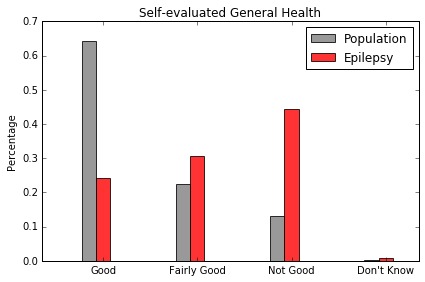

In [381]:
plot("Self-evaluated General Health", ["Good","Fairly Good","Not Good","Don't Know"],a,b)

- Chronic illness

In [382]:
a,b = stat("(D) Regular prescribed medication - binary")

0.0    0.416721
1.0    0.583279
Name: (D) Regular prescribed medication - binary, dtype: float64
0.0    0.029412
1.0    0.970588
Name: (D) Regular prescribed medication - binary, dtype: float64


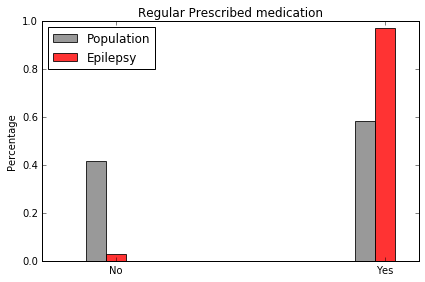

In [383]:
plot("Regular Prescribed medication",["No","Yes"],a,b)

- Depression

In [384]:
a,b = stat("(D) Currently treated for depression - binary")

0.0    0.907093
1.0    0.092907
Name: (D) Currently treated for depression - binary, dtype: float64
0.0    0.650794
1.0    0.349206
Name: (D) Currently treated for depression - binary, dtype: float64


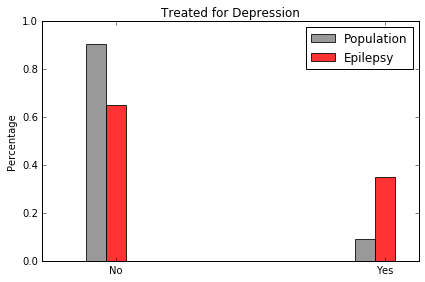

In [385]:
plot("Treated for Depression",["No","Yes"],a,b)

- Anxiety


0.0    0.923804
1.0    0.076196
Name: (D) Currently treated for anxiety - binary, dtype: float64
0.0    0.691667
1.0    0.308333
Name: (D) Currently treated for anxiety - binary, dtype: float64


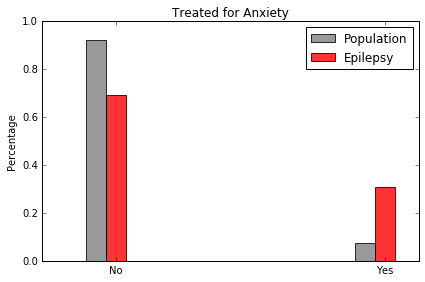

In [386]:
a,b = stat("(D) Currently treated for anxiety - binary")
plot("Treated for Anxiety",["No","Yes"],a,b)

- Permanently unable to work


In [387]:
a,b = stat("Work status")

1.0     0.052201
2.0     0.471669
3.0     0.003941
4.0     0.006023
5.0     0.003198
6.0     0.014352
7.0     0.004387
8.0     0.057927
9.0     0.278480
10.0    0.077261
11.0    0.030562
Name: Work status, dtype: float64
2.0     0.224
3.0     0.024
4.0     0.008
6.0     0.024
7.0     0.016
8.0     0.408
9.0     0.208
10.0    0.048
11.0    0.040
Name: Work status, dtype: float64


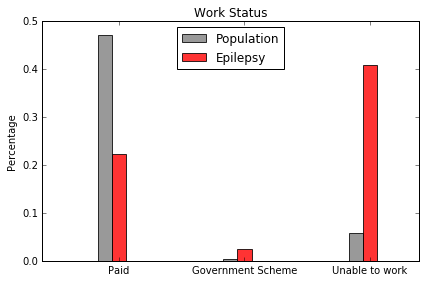

In [388]:
plot("Work Status",["Paid","Government Scheme", "Unable to work"],a,b)

- Low education


0.0    0.640539
1.0    0.359461
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: float64
0.0    0.769231
1.0    0.230769
Name: 5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc, dtype: float64


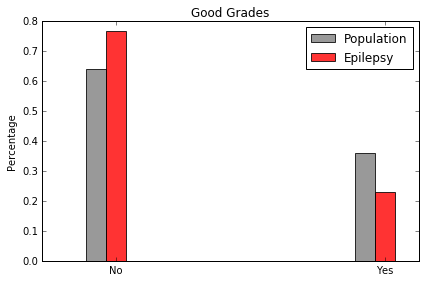

In [389]:
a,b = stat("5+ O levels/CSEs (grade 1) GCSEs (grade A-C) 1 A level, 2-3 AS levels, etc")
plot("Good Grades",["No","Yes"],a,b)

- Not Healthy


0.0    0.798392
1.0    0.201608
Name: (D) Fair or poor health - binary, dtype: float64
0.0    0.473684
1.0    0.526316
Name: (D) Fair or poor health - binary, dtype: float64


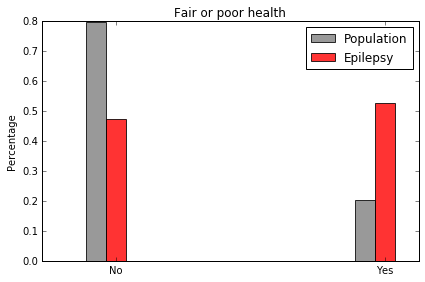

In [390]:
a,b = stat("(D) Fair or poor health - binary")
plot("Fair or poor health",["No","Yes"],a,b)

- Low Vitality


In [391]:
a,b = stat("(D) SF12v2 Vitality score")

0.0      0.128531
25.0     0.147507
50.0     0.277425
75.0     0.374425
100.0    0.072112
Name: (D) SF12v2 Vitality score, dtype: float64
0.0      0.325397
25.0     0.166667
50.0     0.206349
75.0     0.253968
100.0    0.047619
Name: (D) SF12v2 Vitality score, dtype: float64


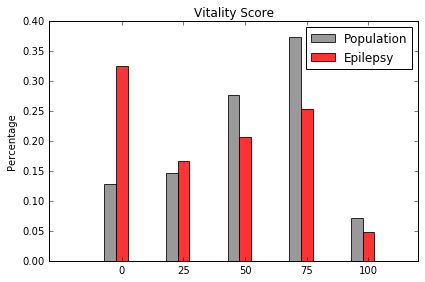

In [392]:
plot("Vitality Score",["0","25","50","75","100"],a,b)

- Low life satisfaction


0.0     0.021170
1.0     0.010330
2.0     0.021170
3.0     0.030554
4.0     0.033755
5.0     0.100393
6.0     0.079150
7.0     0.154590
8.0     0.248727
9.0     0.139532
10.0    0.160629
Name: Life satisfaction, dtype: float64
0.0     0.112903
1.0     0.024194
2.0     0.040323
3.0     0.096774
4.0     0.040323
5.0     0.161290
6.0     0.048387
7.0     0.161290
8.0     0.153226
9.0     0.032258
10.0    0.129032
Name: Life satisfaction, dtype: float64


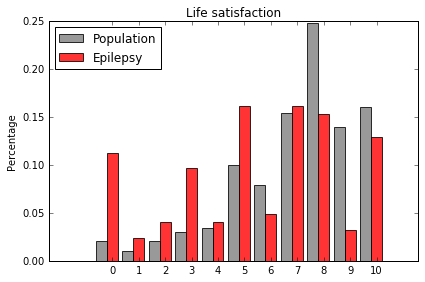

In [393]:
a,b = stat("Life satisfaction")
plot("Life satisfaction",range(11),a,b)

- Limit on bathing or dressing

1.0    0.068842
2.0    0.097399
3.0    0.833758
Name: SF Health limits bathing or dressing yourself, dtype: float64
1.0    0.218750
2.0    0.289062
3.0    0.492188
Name: SF Health limits bathing or dressing yourself, dtype: float64


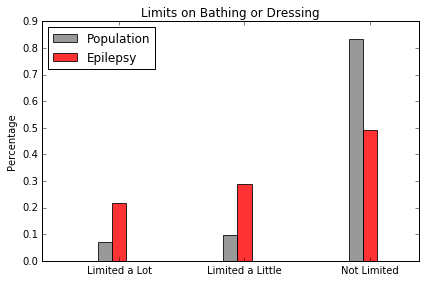

In [394]:
a,b = stat("SF Health limits bathing or dressing yourself")
plot("Limits on Bathing or Dressing",["Limited a Lot","Limited a Little","Not Limited"],a,b)

> ### Conclusions

From the analysis above we see that epilepsy patients are suffering from the chronic disease. From attitude towards life to life quality, they are showing somehow negtive performance. They have to count on permanent medication to control seizures. Moreover, the side effects of medication can heavily influence their vitality.

An idea comes to my mind. What are epilepsy patients saying about life? What are they doing? Are they really afraid or anxious? Then I go to read their stories and visualize their life by words.http://livingwellwithepilepsy.com/blog

In [397]:
#!/usr/bin/env python
"""
Using custom colors
====================
Using the recolor method and custom coloring functions.
"""

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#d = path.dirname(__file__)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open("Word Cloud/stormtrooper_mask.png"))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open("Word Cloud/epilepsy_blog.txt").read()

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("jessica")
stopwords.add("link")
stopwords.add("follow")
stopwords.add("post")
stopwords.add("Blog")
stopwords.add("blog")

wc = WordCloud(max_words=300, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image

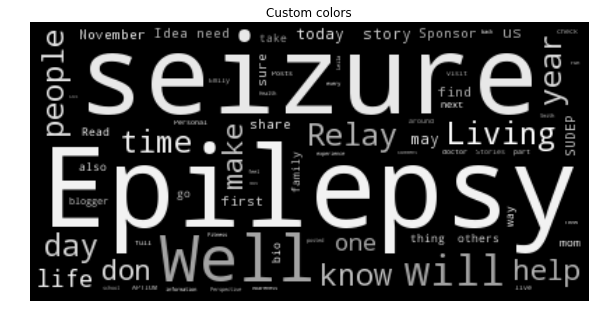

In [398]:
plt.figure(figsize=(10,10))
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
wc.to_file("Word Cloud/a_new_hope.png")
plt.axis("off")
plt.savefig("Blogs.png")

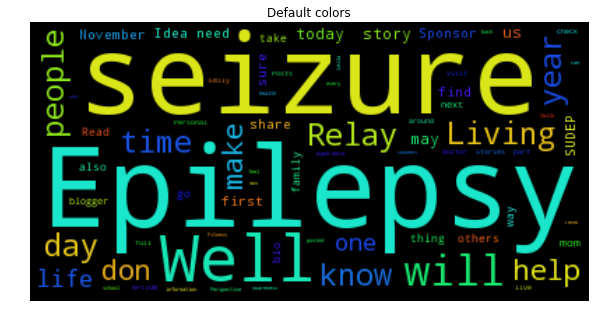

In [399]:
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()

From their stories, I find **Hope**. Look at the words: time, living, will, help, today, well, life.... I am moved by their postive attitude. And I really hope more and more epilepsy patients can share their life and cheer up to live a better life!